In [1]:
import os.path
import time
import numpy as np
from numpy import genfromtxt
import pandas as pd
%matplotlib inline

from functions import Functions

In [3]:
func = Functions()
from denmune import DenMune

#['K', 'ACC', 'F1', 'NMI', 'adj_NMI', 'adj_Rand', 'Homogeneity', 'Completeness' ])    
validity = {}
validity['acc'] = 1
validity['f1'] = 2
validity['nmi'] =3
validity['ami'] = 4
validity['ari'] = 5
validity['homo'] = 6
validity['comp'] = 7

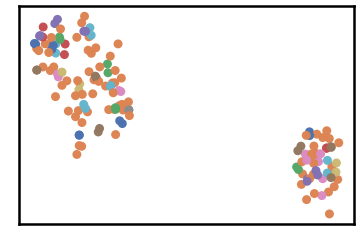

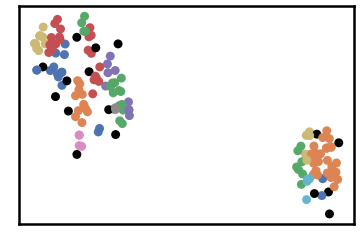

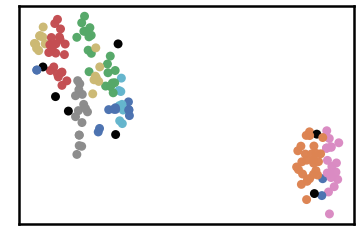

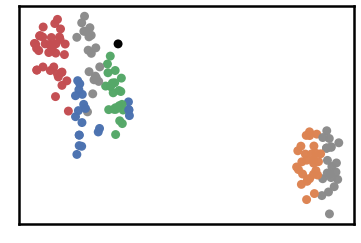

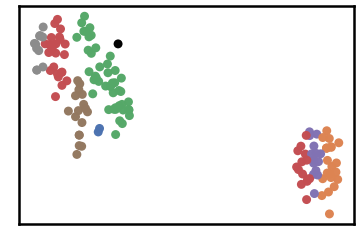

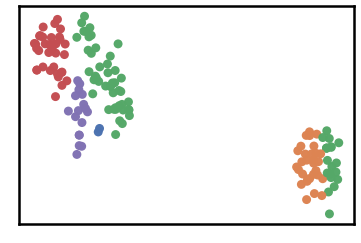

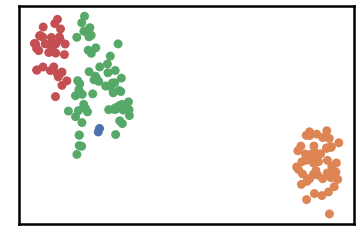

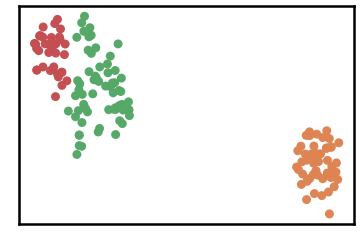

<Figure size 432x288 with 0 Axes>

In [4]:
myvalidity = 'f1'
alg_name = 'denmune'
myvalidity_idx = validity[myvalidity]

dataset = 'iris' # let us take iris dataset as an example
file_path = 'data/'

# DenMune works on a 2-d version of the original dimentional dataset.
#Anyway, DenMune can works on any n-d dataset but it attain its best results on a 2-d redused vsesion

file_2d = file_path + dataset + '-2d.txt'
file_labels =  dataset +'-gt.txt' #dataset + '-gt.txt'
labels_true = genfromtxt(file_path+file_labels)
labels_true = labels_true.astype(np.int64)

if  not os.path.isfile(file_2d):
    func.generate_tsne(dataset, 2) 
    #this will generate a 2-d file of the tested dataset named dataset-2d.txt i.e. iris-2d.txt
    
data = genfromtxt(file_2d , delimiter='\t')
func.plot_clusters(data=data, labels=labels_true, alg_name='ground', dp_name=dataset +'-2d', show=False)


file_save_pre = 'results/' + alg_name +'/csv/'  + alg_name
file_save = file_save_pre + '_para_'  + dataset + '.csv'

file_para = 'para_' + dataset + '.csv'
df = pd.DataFrame(columns =['K', 'ACC', 'F1', 'NMI', 'AMI', 'ARI','Homogeneity', 'Completeness', 'Time' ])

best_validity = -100
best_knn = -1
dp_dis = [] # it is a must to clear dp_dis before the loop
#labels_pred = [] within each loop should be rest to empty

max_knn  = 50

start =1
step =1
end =  max_knn


for n in range(start, end+1, step):


    solution_file = 'solution.txt'
    if  os.path.isfile(solution_file):
        os.remove(solution_file)

    start_time= time.time()
    py = DenMune(data=data, k_nearest=n)
    end_time= time.time()

    
    labels_pred = []
    labels_pred = genfromtxt(solution_file)
    labels_pred = func.match_Labels(labels_pred, labels_true)

    validity_index = func.calc_Metrics(labels_true, labels_pred)
    if (best_validity < validity_index[myvalidity_idx]):
        best_validity = validity_index[myvalidity_idx]
        best_knn = 'k= ' + str(n)
        func.plot_clusters(data=data, labels=labels_pred, alg_name=alg_name, dp_name=dataset, show=True)

    validity_index[0]  = str(n)
    validity_index[-1] = end_time-start_time

    df = df.append(pd.Series(validity_index, index=df.columns ), ignore_index=True)
    #df.sort_values(by=['ACC', 'NMI', 'ARI'] , ascending=False, inplace=True)   
    df.to_csv(file_save, index=False, sep='\t', header=True)

    print('loop ' + str(n)  + ' ' + myvalidity.upper() + ' is ' + str(validity_index[myvalidity_idx]) + ' THE best ' + myvalidity.upper() + ' is ' + str(best_validity) + " at KNN = " + str(best_knn) + '   ', end='')            
    func.backline()

df.to_csv(file_save, index=False, sep='\t', header=True)


In [ ]:
labels_pred


In [ ]:
labels_true

In [ ]:
df